# 3.1 Linear Filters

Def:**Support of a function**:

For a function f∶ Ω → R its support is the set of all non zero arguments
    $\operatorname{supp}(f) = \{ x \in \Omega \mid f(x) \ne 0 \}$

Ex: 
Suppose  
$f(x) = \begin{cases} 
x^2 & \text{if } x \in [-1, 1], \\
0 & \text{otherwise} 
\end{cases}$.

Then $\operatorname{supp}(f) = (-1, 1)$,  
or more precisely,  
$\operatorname{supp}(f) = \{ x \in \mathbb{R} \mid x \in [-1, 1] \}$,  
because outside that interval, the function is zero.

Def: **Correlation of Image over the kernel**

$$
[I \star K](x,y) = \sum_{(i,j) \in \text{supp}(K)} K(i,j) \cdot I(x+i, y+j)
$$



This means:

- Slide the kernel **$K$** across the image **$I$**.
- For each location $(x, y)$ in the output:
  1. Align the kernel with the image starting at $(x, y)$.
  2. Multiply each kernel value with the corresponding image value.
  3. Add them all up.

This gives the value of the output image at $(x, y)$.
- Unlike in convolution, kernel is not flipped.

**Example:**
Let the image matrix \(I\) be:

$$
I = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$$

and the kernel matrix \(K\) be:

$$
K = \begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$$

Using the correlation formula

$$
[I \star K](x,y) = \sum_{(i,j) \in \text{supp}(K)} K(i,j) \cdot I(x+i, y+j),
$$

we compute the output at position \((0,0)\) by applying the kernel to the top-left patch of \(I\):

$$
\begin{aligned}
[I \star K](0,0) &= 1 \cdot I(0,0) + 0 \cdot I(0,1) + 0 \cdot I(1,0) + (-1) \cdot I(1,1) \\
&= 1 \cdot 1 + 0 \cdot 2 + 0 \cdot 4 + (-1) \cdot 5 = -4
\end{aligned}
$$

Repeating this for all valid positions produces the output matrix:

$$
[I \star K] = \begin{bmatrix}
-4 & -4 \\
-4 & -4
\end{bmatrix}
$$



Def: **Convolution of the Image over the kernel**

**Convolution:**

$[I * K](x, y) = \sum_{(i, j) \in \operatorname{supp}(K)} K(i, j) \cdot I(x - i, y - j)$

The kernel $K$ is flipped both horizontally and vertically before applying.

At each position $(x, y)$, multiply the flipped kernel with the image patch and sum.

Used for filtering, blurring, and edge detection in a mathematically principled way.

Many deep learning libraries implement *correlation* but call it *convolution*.

Suppose the image $I = \bigl[\begin{smallmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{smallmatrix}\bigr]$ 

and the kernel 
$K = \bigl[\begin{smallmatrix} 1 & 0 \\ 0 & -1 \end{smallmatrix}\bigr]$.

 Then flip $K$ horizontally and vertically to get 
 
 $K_{\text{flipped}} = \bigl[\begin{smallmatrix} -1 & 0 \\ 0 & 1 \end{smallmatrix}\bigr]$.
 
  The final output matrix after 
  convolution is:
  
   $[I * K_{\text{flipped}} ] = \bigl[\begin{smallmatrix} 4 & 4 \\ 4 & 4 \end{smallmatrix}\bigr]$.


# Correlation vs Convolution

If $\sum_i f_i = 1$, then $[f \circledast u]_k$ and $[f \ast u]_k$ are convex combinations of the elements of $u_j$.

With the mirroring $\tilde{f}i = f{-i}$, we have:
$[f \circledast u]_k = \sum_i f_i \cdot u_{k+i} = \sum_i \tilde{f}_{-i} \cdot u_{k+i} = \sum_j \tilde{f}_j \cdot u_{k-j} = [\tilde{f} \ast u]_k$

In particular, for symmetric filters where $f_i = f_{-i}$, the equality holds:
$f \ast u = f \circledast u$

With the substitution $j = k + i$, i.e., $i = j - k$, we obtain:
$[f \circledast u]k = \sum_i f_i \cdot u{k+i} = \sum_j u_j \cdot f_{j - k} = [u \circledast f]_{-k} \Rightarrow f \circledast u = \tilde{u} \circledast f$

Convolution and correlation are very similar. Correlation is easier to understand and is implemented in image analysis software as filter functions like imfilter(u, f) in MATLAB.

In mathematics, convolution is used more often because it has much nicer properties.


# 3.5 Properties of Convolution

You're referring to properties of convolution for sequences (or signals) $u, v, w \in \ell^1(\mathbb{Z}^d)$, which means they are absolutely summable functions defined over the integer lattice $\mathbb{Z}^d$. These are commonly encountered in signal processing and image filtering.

a) Commutativity:
$u \star v = v \star u$
Convolution is commutative: switching the order of operands does not change the result. This means the output is the same whether you convolve $u$ with $v$, or $v$ with $u$.

b) Associativity:
$(u \star v) \star w = u \star (v \star w)$
You can group the convolutions in any order. This is useful when applying multiple filters sequentially — it guarantees that the order of operations doesn't affect the final result (as long as the sequence of filters remains the same).

c) Mirroring:
$\tilde{u} \star \tilde{v} = \widetilde{u \star v}$, where $\tilde{u}_i = u_{-i}$
This states that convolving two mirrored signals is the same as mirroring the convolution of the original signals.

d) Linearity:
$u \star (v + \alpha w) = u \star v + \alpha (u \star w)$
Convolution is linear with respect to addition and scalar multiplication. This is extremely important in systems theory: if a system is linear, the convolution operation preserves this linearity.

e) Continuity / Young’s Inequality:
$| u \star v |_1 \leq | u |_1 \cdot | v |_1$
This is a version of Young’s inequality for convolutions. It tells us that the output of the convolution will not be "larger" (in $\ell^1$-norm) than the product of the norms of the inputs. It's a kind of energy control for the convolution.

Theorem 3.5 states, that ℓ1(Z) together with the convolution is a Banach algebra, i.e. it is
a vector spaces with an additional operation.


# What is Banach space?

A Banach space is a vector space equipped with a norm (a way to measure size or length).

And it’s complete, meaning limits of sequences inside the space stay inside the space.

For $\ell^1(\mathbb{Z})$, the norm is:
$|u|_1 = \sum_i |u_i|$

This space is complete under this norm.

**Defiition 3.3 (Moving Average):**  
Let $f_i = \frac{1}{2n+1}$ for $i = -n, \ldots, n$ and $u_i$ an arbitrary signal. Then:

$$
[f \star u]_k = \frac{1}{2n + 1}(u_{k - n} + \ldots + u_k + \ldots + u_{k + n})
$$

$[f \star u]_k = \frac{1}{2n + 1} \sum_{i=-n}^{n} x_{k+i}$


This is the moving average of $u$ with window size $2n + 1$.  
As $n$ becomes larger, $f \star u$ becomes more and more smooth.

The moving average filter is the simplest smoothing filter.It allocates same weight throughout the distribution.

It replaces each value by the average of its neighbors within a window.





# Correlation vs Covolution of 2D image

Let $f = (f_{i j})$, $u = (u_{i j})$, $i, j \in \mathbb{Z}$ be two infinite discrete images. Then their **correlation** is defined as

$$
[f \star u]_{k, \ell} = \sum_{(i,j) \in \mathrm{supp}(f)} f_{i,j} \cdot u_{k+i, \ell+j}
$$

and their **convolution** as

$$
[f \star u]_{k, \ell} = \sum_{(i,j) \in \mathrm{supp}(f)} f_{i,j} \cdot u_{k - i, \ell - j}
$$

> *Note:* Here we use $\star$ for both correlation and convolution, but the difference is in the indices' signs.



# Smoothening Filters

**Gaussian Filter**:   

 A weighted average where neighbors closer to the center have higher weight using gaussian distribution (bell-shaped weights).

 cutoff for ∣j∣ > N = 3σ

 Assume f such that fj ≥ 0 ∑ fj = 1. 
 
Gaussian kernel of 2d image is: 

$f_{i,j} = \frac{1}{C} e^{-\frac{i^2 + j^2}{2\sigma^2}}$

$C = \sum_{j=-N}^{N} e^{-\frac{i^2 + j^2}{2\sigma^2}}$



We will compute a 3×3 kernel with $\sigma = 1$. The center of the kernel is $(0,0)$, and indices range from $-1$ to $1$ in both directions.

We first compute the unnormalized values, then normalize them.

### Step 1: Compute Unnormalized Values

$$
f_{i,j} = e^{-\frac{i^2 + j^2}{2\sigma^2}}
$$

Let’s fill in the values for each $(i,j)$ from $-1$ to $1$:

| $(i, j)$     | $i^2 + j^2$ | $f_{i,j} = e^{-(i^2 + j^2)/{2\sigma^2}}$ |
|-------------|-------------|-------------------------------|
| (-1, -1)    | 2           | $e^{-1} \approx 0.3679$       |
| (-1, 0)     | 1           | $e^{-0.5} \approx 0.6065$     |
| (-1, 1)     | 2           | $\approx 0.3679$              |
| (0, -1)     | 1           | $\approx 0.6065$              |
| (0, 0)      | 0           | $e^{0} = 1$                   |
| (0, 1)      | 1           | $\approx 0.6065$              |
| (1, -1)     | 2           | $\approx 0.3679$              |
| (1, 0)      | 1           | $\approx 0.6065$              |
| (1, 1)      | 2           | $\approx 0.3679$              |

So the **unnormalized kernel** is:

$$
\begin{bmatrix}
0.3679 & 0.6065 & 0.3679 \\
0.6065 & 1.0000 & 0.6065 \\
0.3679 & 0.6065 & 0.3679 \\
\end{bmatrix}
$$

---

### Step 2: Normalize the Kernel

Sum of all values:

$$
S = 4 \cdot 0.3679 + 4 \cdot 0.6065 + 1 = 1.4716 + 2.4260 + 1 = 4.8976
$$

Normalize each element:

$$
K_{i,j} = \frac{f_{i,j}}{4.8976}
$$


So the **normalized kernel** is approximately:

$$
K \approx
\begin{bmatrix}
0.0751 & 0.1238 & 0.0751 \\
0.1238 & 0.2042 & 0.1238 \\
0.0751 & 0.1238 & 0.0751 \\
\end{bmatrix}
$$

We first compute the unnormalized values, then normalize them.
Then [f ⍟ u]k is the convex combination or weighted average of the neighbors of $u_k$.

---
Computing the correlation b/w pixels and kernels.

**Step 1: Gaussian Kernel (3×3 example from before):**

$K \approx
\begin{bmatrix}
0.0751 & 0.1238 & 0.0751 \\
0.1238 & 0.2042 & 0.1238 \\
0.0751 & 0.1238 & 0.0751
\end{bmatrix}$

---

**Step 2: Align kernel on pixel 52 at $(0,0)$**

Since it's a border pixel, you usually pad the image (e.g., with zeros or by replicating border values). For simplicity, let’s assume zero-padding outside the image.

---

**Step 3: Calculate weighted sum**

New value at $(0,0) = \sum_{i=-1}^{1} \sum_{j=-1}^{1} K_{i,j} \times I_{0+i, 0+j}$

Using zero-padding for pixels outside bounds:

| Position | Image Value | Kernel Weight | Product       |
|----------|-------------|---------------|---------------|
| $(-1,-1)$| 0           | 0.0751        | 0             |
| $(-1,0)$ | 0           | 0.1238        | 0             |
| $(-1,1)$ | 0           | 0.0751        | 0             |
| $(0,-1)$ | 0           | 0.1238        | 0             |
| $(0,0)$  | 52          | 0.2042        | $52 \times 0.2042 = 10.61$ |
| $(0,1)$  | 68          | 0.1238        | $68 \times 0.1238 = 8.42$  |
| $(1,-1)$ | 0           | 0.0751        | 0             |
| $(1,0)$  | 55          | 0.1238        | $55 \times 0.1238 = 6.81$  |
| $(1,1)$  | 70          | 0.0751        | $70 \times 0.0751 = 5.26$  |

---

**Step 4: Add all up**

$10.61 + 8.42 + 6.81 + 5.26 = 31.10$


# Bionomial Filter

The Binomial filter is a type of smoothing filter whose coefficients are based on binomial coefficients (from Pascal’s triangle). It’s often used in signal and image processing to smooth data, similar to a Gaussian filter but simpler to compute.

The filter coefficients for order $n$ are given by:

$$
B_{n j} = 2^{-n} \binom{n}{j + \frac{n}{2}}
$$

where:

$\displaystyle \binom{n}{k}$ is the binomial coefficient ("n choose k").

$j$ ranges over the filter indices centered around zero.


​


### Convert 1D Filter to 2D Kernel

Images are 2D, so convert your 1D filter $B_n$ into a 2D kernel by taking the outer product of $B_n$ with itself:

$$
K = B_n^T \times B_n
$$

For $B_2$:

$$
K = 
\begin{bmatrix}
1 & 2 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
2 \\
1
\end{bmatrix}
/16
= \frac{1}{16}
\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1 \\
\end{bmatrix}
$$

---

###  Apply the Kernel on the Image (Convolution)

Convolve the image with the kernel $K$.

For each pixel in the image:

- Place the kernel centered at that pixel.
- Multiply overlapping pixel values by the kernel weights.
- Sum the results to get the new pixel value.

This smooths the image, reducing noise and details.

---

### Handle Edges

Because the kernel extends beyond border pixels, use padding techniques such as:

- Zero padding (fill outside with 0)
- Replicate edge pixels
- Reflect image along edges

# Difference Filters

Difference filters are discrete approximations of derivatives. Since digital images and signals are sampled (not continuous), we can't compute true derivatives. Instead, we use formulas like:

| Difference                  | Formula                                                        | Filter weights                           | Approximates      |
| --------------------------- | -------------------------------------------------------------- | ---------------------------------------- | ----------------- |
| **Forward difference**      | $\displaystyle \frac{u(x_0 + h) - u(x_0)}{h}$                  | $\displaystyle \frac{1}{h} (0, -1, 1)$   | First derivative  |
| **Backward difference**     | $\displaystyle \frac{u(x_0) - u(x_0 - h)}{h}$                  | $\displaystyle \frac{1}{h} (-1, 1, 0)$   | First derivative  |
| **Centered difference**     | $\displaystyle \frac{u(x_0 + h) - u(x_0 - h)}{2h}$             | $\displaystyle \frac{1}{2h} (-1, 0, 1)$  | First derivative  |
| **Second order difference** | $\displaystyle \frac{u(x_0 + h) - 2 u(x_0) + u(x_0 - h)}{h^2}$ | $\displaystyle \frac{1}{h^2} (1, -2, 1)$ | Second derivative |


They are used to approximate first and second derivatives of a function 𝑢(𝑥), which is critical in edge detection, image gradients, and signal processing.

# Properties of Difference Filters

i) First-order forward/backward difference
If $u \in C^2$ (i.e., twice differentiable), then:

$|D_h^{\pm} u(x_0) - u'(x_0)| \leq \frac{1}{2} |u''|_{\infty} \cdot h$

Forward/backward differences approximate $u'(x_0)$ with an error proportional to $h$.

Smaller $h$ $\rightarrow$ better approximation.

$|u''|_{\infty}$ is the maximum second derivative — it controls how curved the function is.

ii) Central difference (better!)
If $u \in C^3$, then:

$|D_h u(x_0) - u'(x_0)| \leq \frac{1}{6} |u'''|_{\infty} \cdot h^2$

Central difference gives a second-order accurate approximation.

Error is proportional to $h^2$, so it drops faster as $h \rightarrow 0$.

iii) Second derivative
If $u \in C^4$, then:

$|D_h^2 u(x_0) - u''(x_0)| \leq \frac{1}{12} |u^{(4)}|_{\infty} \cdot h^2$

This estimates the second derivative $u''$ with second-order accuracy.

Useful for detecting curvature and edges in image analysis.

 # Finite signals

Finite signals ui, i = 1, . . . , n are usually extended across the boundary by setting for all i=1,2,3,4,...

1. Zero Padding
Set values beyond the boundary to zero.

Rule:

$u_{n+i} = 0$

$u_{1-i} = 0$

Interpretation: Assume the signal is zero outside the original range.

MATLAB: imfilter(u, f) (default)

✅ Simple, but can create artificial edges.

2. Nearest Neighbor (Replication)
Copy the closest boundary value.

Rule:

$u_{n+i} = u_n$

$u_{1-i} = u_1$

Interpretation: Keep repeating the edge value.

MATLAB: imfilter(u, f, 'replicate')

✅ Preserves constant areas near borders.

3. Periodization (Circular Padding)
Wrap the signal around like a circle.

Rule:

$u_{n+i} = u_i$

$u_{1-i} = u_{n+1-i}$

Interpretation: The signal repeats cyclically.

MATLAB: imfilter(u, f, 'circular')

✅ Good for periodic data, but may introduce wrap-around artifacts.

4. Mirroring (Symmetric Padding)
Reflect the signal at the boundaries.

Rule:

$u_{n+i} = u_{n-i}$

$u_{1-i} = u_{1+i}$

Interpretation: Imagine a mirror placed at the edge of the signal.

MATLAB: imfilter(u, f, 'symmetric')

✅ Smoothest for many real-world signals and images. Reduces boundary artifacts.



### What are $\ell^p$ spaces?

The space $\ell^p(\mathbb{Z})$ is the set of all sequences $x = (x_n)$ such that:


It belongs to an $\ell^p$ space, i.e., it satisfies:

$$
\|x\|_p = \left( \sum_{n \in \mathbb{Z}} |x_n|^p \right)^{1/p} < \infty
$$

In practical terms:

- For $p = 1$: the sequence is **absolutely summable** (e.g., it decays fast enough so the sum of magnitudes is finite).
- For $p = 2$: the sequence is **square-summable** (has finite energy, as in signal processing).
- For $p = \infty$: the sequence is **bounded** (no term grows arbitrarily large).

So, a sequence is considered "nice" if its $\ell^p$-norm is finite — it doesn’t blow up.


# Youngs Inequality

For $1 \leq p, q, r \leq \infty$ such that

$$
\frac{1}{p} + \frac{1}{q} = 1 + \frac{1}{r}
$$

and $u \in \ell^p$, $v \in \ell^q$, we have $u \star v \in \ell^r$ with

$$
\|u \star v\|_r \leq \|u\|_p \, \|v\|_q.
$$


This tells you that the convolution of two sequences is still "integrable" (or summable) in the 
$ℓ_𝑟$
 -sense, and its size is controlled by the sizes of the original sequences. This is a kind of norm inequality, ensuring that convolution doesn't distort the signal too much.

# 2 filters across every dimension of the covolution

## Background: 1D Convolution

For a sequence (vector) $u = (u_k)$ and a filter $a = (a_i)$, the 1D convolution is defined as:

$$
[a \star_1 u]_i = \sum_k a_i \cdot u_{k - i}
$$

This means: at position $i$, the output is a weighted sum of the input values shifted by $i$, weighted by $a_i$.

---

## Two-Dimensional Convolution Along Each Dimension

You have a 2D sequence or image $u = (u_{i,j})$, and two one-dimensional filters:

- $a = (a_i)$ — a filter applied **along the first dimension** (rows)  
- $b = (b_j)$ — a filter applied **along the second dimension** (columns)

The two types of 1D convolutions are:

- Along the first dimension (rows):

$$
[a \star_1 u]_{i,j} = \sum_k a_i \cdot u_{k - i, j}
$$

- Along the second dimension (columns):

$$
[b \star_2 u]_{i,j} = \sum_\ell b_j \cdot u_{i, \ell - j}
$$

So you convolve **only along rows** for $a \star_1 u$, and **only along columns** for $b \star_2 u$.

---

## Key Property: Commutativity of Sequential 1D Convolutions

The statement says:

$$
b \star_2 (a \star_1 u) = a \star_1 (b \star_2 u) = (a \otimes b) \star u
$$

This means:

- Applying filter $a$ along the rows, then filter $b$ along the columns  
- Or applying filter $b$ along the columns, then filter $a$ along the rows

Both produce the **same result**!

---

## What is $a \otimes b$? The Tensor (Outer) Product

The 2D filter $f = a \otimes b$ is formed by multiplying each element of $a$ with each element of $b$:

$$
f = \begin{pmatrix}
a_1 b_1 & a_1 b_2 & \cdots & a_1 b_n \\
a_2 b_1 & a_2 b_2 & \cdots & a_2 b_n \\
\vdots & \vdots & \ddots & \vdots \\
a_m b_1 & a_m b_2 & \cdots & a_m b_n
\end{pmatrix}
$$

That is,

$$
f_{i,j} = a_i b_j
$$

for two one-dimensional filters $a$ and $b$.

---

## What Does This Mean in Practice?

Instead of convolving the 2D image $u$ with a big 2D filter $f$ directly, you can do two simpler 1D convolutions sequentially:

- Convolve each row with $a$  
- Then convolve each column with $b$

The result is the same as convolving $u$ with the full 2D filter $f = a \otimes b$.

This is useful because 1D convolutions are **computationally cheaper** than 2D convolutions.


## Moving Average Filter (Box Filter)

### Definition

$f_{i,j} = C^{-1} \cdot 
\begin{cases}
1 & \text{if } |i| \leq N \text{ and } |j| \leq N \\
0 & \text{otherwise}
\end{cases}$

### Explanation

- This filter has equal weight (1) in a square of size $(2N+1) \times (2N+1)$.
- All values outside the square are 0.
- $C^{-1}$ is chosen so that the total sum of the weights equals 1:
  - $C = (2N + 1)^2$

### What it does

- Averages the pixel values in a local square patch.
- Used for **uniform blurring**, **noise reduction**.
- Simple and fast, but may cause edge artifacts.

---

## 2. Disk Filter

### Definition

$f_{i,j} = C^{-1} \cdot 
\begin{cases}
1 & \text{if } i^2 + j^2 \leq N^2 \\
0 & \text{otherwise}
\end{cases}$

### Explanation

- This filter is 1 inside a **disk of radius $N$** centered at the origin.
- Outside the circle, the filter is 0.
- $C^{-1}$ is the normalization constant so the weights sum to 1.

### What it does

- Smooths the image like the box filter, but in a **circular region**.
- Has **better rotational symmetry** than the box filter → smoother blur.

---

## 3. Gaussian Filter

### Definition (2D Isotropic Gaussian)

$f_{i,j} = C^{-1} \cdot e^{-\frac{i^2 + j^2}{2\sigma^2}}$

### Or (2D Anisotropic / Separable Gaussian)

$f_{i,j} = C^{-1} \cdot e^{-\frac{i^2}{2\sigma_1^2}} \cdot e^{-\frac{j^2}{2\sigma_2^2}}$

### Explanation

- Values are highest at the center and fall off smoothly with distance.
- $\sigma$ controls the amount of smoothing:
  - Small $\sigma$ → sharp, local filter
  - Large $\sigma$ → broader blur
- The **separable form** means it can be implemented as:
  - One 1D Gaussian in the horizontal direction
  - One 1D Gaussian in the vertical direction
- This **speeds up computation** significantly.

###  What it does

- Smooths the image **gently and naturally**.
- **Preserves edges** better than the box filter.
- Widely used in **computer vision**, **image preprocessing**, etc.



# Edge detection filters:

Sobel Filter:
Tensor product of a bionomial filter in one direction and centered difference filter in other direction.


```math
f = \frac{1}{4}
\begin{bmatrix}
1 & 2 & 1
\end{bmatrix}
\otimes \frac{1}{2}
\begin{bmatrix}
1 \\
0 \\
-1
\end{bmatrix}
= \frac{1}{8}
\begin{bmatrix}
1 & 2 & 1 \\
0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}
```


Prewitt filter: Tensor product of a moving average filter in one direction and a centered difference filter in other direction.



```math
f = \frac{1}{3}
\begin{bmatrix}
1 & 1 & 1
\end{bmatrix}
\otimes \frac{1}{2}
\begin{bmatrix}
1 \\
0 \\
-1
\end{bmatrix}
= \frac{1}{6}
\begin{bmatrix}
1 & 1 & 1 \\
0 & 0 & 0 \\
-1 & -1 & -1
\end{bmatrix}
```


# Effect filters:

**Motion Filter:**  
$f_{ij} = C^{-1} \begin{cases} 
1 & |i| \leq N \text{ and } j=0 \\ 
0 & \text{otherwise} 
\end{cases}$  
*moving average in only one direction*

**Duto Filter:**  
$u = \lambda u + (1-\lambda) G \star u = (\lambda \delta_0 + (1-\lambda) G) \star u$  
where $G$ is a Gaussian filter  
→ superposition of the image with a smoothed version of itself

**Laplace Filter:** sum of the second order difference in $x$ and $y$ direction  
$$
f = (1 \ -2 \ 1) \otimes 
\begin{bmatrix}
0 \\
1 \\
0
\end{bmatrix}
+ (0 \ 1 \ 0) \otimes 
\begin{bmatrix}
1 \\
-2 \\
1
\end{bmatrix}
= 
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}
$$

→ can be used to sharpen a blurred image


# Noise Optimal Filtering

Consider an image $u^0_{ij}$ disturbed by additive Gaussian white noise $\varepsilon_{ij}$:

$$
u_{ij} = u^0_{ij} + \varepsilon_{ij}
$$

Then the filtered image $f \star u$ is a random variable with expected value:

$$
\mathbb{E}[f \star u] = \mathbb{E}[f \star (u^0 + \varepsilon)] = \mathbb{E}[f \star u^0] + \mathbb{E}[f \star \varepsilon] = f \star u^0
$$

The expected $\ell_2$-error between the filtered noisy image $f \star u$ and the noise-free image $u^0$ is called the **mean integrated squared error (MISE)** and decomposes into:

$$
\begin{aligned}
\text{MISE} &= \mathbb{E} \| f \star u - u^0 \|_2^2 \\
&= \mathbb{E} \| f \star (u^0 + \varepsilon) - u^0 \|_2^2 \\
&= \underbrace{\| f \star u^0 - u^0 \|_2^2}_{\text{bias}} + \underbrace{\mathbb{E} \| f \star \varepsilon \|_2^2}_{\text{variance}}
\end{aligned}
$$

Using that $\varepsilon_{ij}$ is i.i.d. with variance $\sigma^2$, we obtain for the variance term:

$$
\mathbb{E} \| f \star \varepsilon \|_2^2 = \sum_{ij} |f_{ij}|^2 \sigma^2 = \sigma^2 \| f \|_2^2
$$


# Linear Filters

A linear filter is a mapping $u \mapsto F(u)$ such that for any two images $u, v$ and $\alpha \in \mathbb{R}$ it satisfies


$F(u + \alpha v) = F(u) + \alpha F(v)$.

- F is linear filter operator that acts on the image u.

- Every convolutional filter F(u) = f ⋆ u is a linear filter.

- Convolutional filters are a part of linear filters, where filtering operation can be expressed as convolution.

# Which linear filters are convolutional?

All linear, shift-invarient filters can be represented as convolutional filters.

- Shift-invarient means the filter acts the same everywhere in the image- the kernel doesn't change with position.

- If a linear filter is not shift-invarient, it cannot be represented by convolution.

Proof:
This is a consequence of the **shift-invariance** of convolution.

The convolution $F(u) = f \star u$ at position $k$ is:

$$
(Fu)_k = \sum_m f_m \cdot u_{k - m}
$$

Apply a shift operator $S$ **after** filtering:

$$
(S(Fu))_k = (Fu)_{k - 1} = \sum_m f_m \cdot u_{k - 1 - m}
$$

Apply filtering **after** a shift:

$$
(F(Su))_k = \sum_m f_m \cdot (Su)_{k - m} = \sum_m f_m \cdot u_{k - m - 1}
$$

**Comparing both:**

$$
(S(Fu))_k = \sum_m f_m \cdot u_{k - 1 - m} = (F(Su))_k
$$

The two expressions are the same — the indices are just relabeled — and the terms are equal due to the **commutativity of addition**.

Therefore, convolution is **shift-invariant**: applying a shift before or after filtering gives the same result.



# Theorem 3.11: Convolution Theorem

Let $F : \ell^1(\mathbb{Z}) \to \ell^1(\mathbb{Z})$ be a **linear filter**, i.e., a linear map that takes discrete signals (absolutely summable sequences) as input and returns discrete signals as output.

**The following are equivalent:**

- $F$ is a **convolutional filter**
- $F$ **intertwines with the shift operator**
- $F$ is a **multiplication operator in Fourier space**

# Matrix representation of Linear Filters

Applying a linear filter to a 2d image is the same as multiplying a specially constructed matrix F by vectorized version of the image.
Any linear filter **F** can be represented by some matrix **F**, i.e.,

$$
\text{vec}(F(u)) = F \, \text{vec}(u)
$$

where

$$
\text{vec}(u) = (u_{11}, \ldots, u_{m1}, u_{12}, \ldots, u_{m2}, \ldots, u_{mn})^\top
$$

For convolutional filters, the matrix **F** has a very specific structure which depends on  
the imposed boundary condition.



# F for zero padding

Any linear filter $F$ can be represented by a matrix $F$, i.e.,
$\text{vec}(F(u)) = F,\text{vec}(u)$
where
$\text{vec}(u) = (u_{11}, \ldots, u_{m1}, u_{12}, \ldots, u_{m2}, \ldots, u_{mn})^\top$

For a one-dimensional filter $f = (\ldots, f_{-2}, f_{-1}, f_0, f_1, f_2, \ldots)$,
the matrix $F$ describing the 1D convolution $f \star u$ is a Toeplitz matrix:

F = 
⎡ f₀  f₋₁  f₋₂   0    ⋯     0 ⎤
⎢ f₁   f₀  f₋₁  f₋₂   ⋱    ⋮ ⎥
⎢ f₂   f₁   f₀  f₋₁   ⋱    0 ⎥
⎢ 0    f₂   f₁   f₀   ⋱  f₋₂ ⎥
⎢ ⋮    ⋱   ⋱   ⋱    ⋱  f₋₁ ⎥
⎣ 0    ⋯    0   f₂   f₁   f₀ ⎦


This matrix shifts the filter across the input and applies the weights accordingly.
Each row is a shifted copy of the filter, aligned such that $f_0$ multiplies the corresponding input value.
Zeros appear at positions where the filter extends beyond the signal — this reflects zero-padding boundary conditions.

Toeplitz matrices have constant values along each descending diagonal:
$F_{i,j} = f_{i-j}$


# boundary functions

# Finite Signals

Finite signals $u_i$, $i = 1, \ldots, n$ are usually extended across the boundary by setting, for all  
$i = 1, \ldots, \#\operatorname{supp}(f)$:

- **Zero padding**: $u_{n+i} = 0$ and $u_{1-i} = 0$  
  → `imfilter(u, f)`

- **Nearest neighbor**: $u_{n+i} = u_n$ and $u_{1-i} = u_1$  
  → `imfilter(u, f, 'replicate')`

- **Periodization**: $u_{n+i} = u_i$ and $u_{1-i} = u_{n+1-i}$  
  → `imfilter(u, f, 'circular')`

- **Mirroring**: $u_{n+i} = u_{n-i}$ and $u_{1-i} = u_{1+i}$


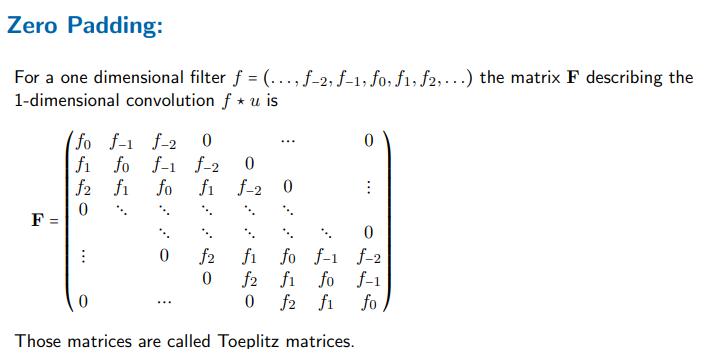

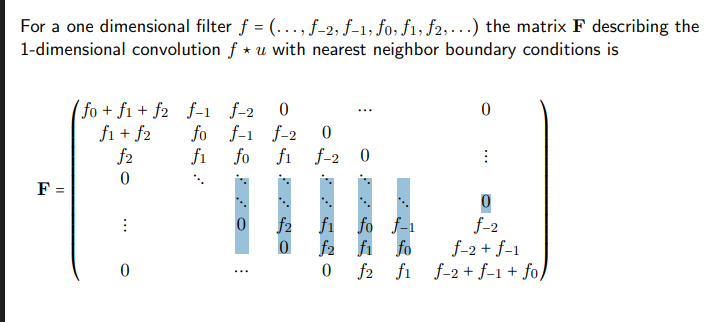

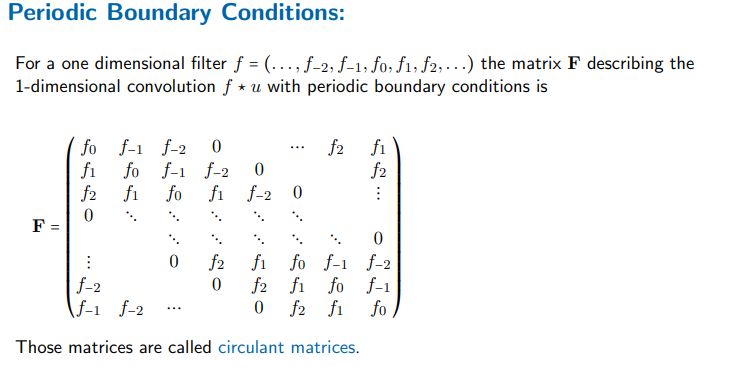

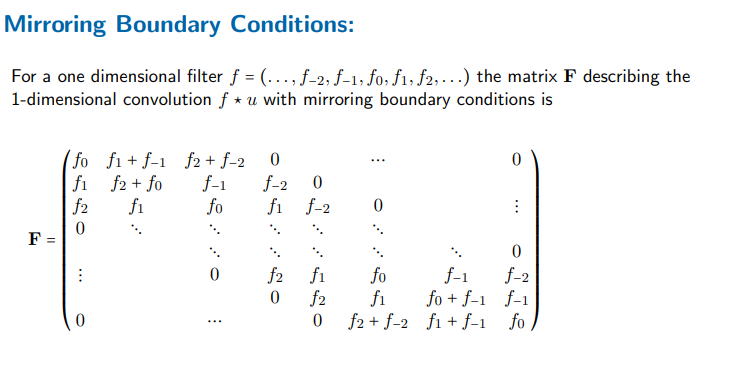

We have a $2 \times 2$ image (very small for simplicity):

$u = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$

And a sharpening filter kernel:

$K = \begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0 \end{bmatrix}$

We assume **zero-padding** so the output is also $2 \times 2$.

---

**Step 1: Compute** $\text{vec}(u)$

We use **column-major order**:

$\text{vec}(u) = \begin{bmatrix} u_{11} \\ u_{21} \\ u_{12} \\ u_{22} \end{bmatrix} = \begin{bmatrix} 1 \\ 3 \\ 2 \\ 4 \end{bmatrix}$

---

**Step 2: Apply the filter → $F(u)$**

Convolve each pixel with zero-padding:

- At $(1,1)$: $F(u)_{11} = 5 \cdot 1 - 1 \cdot 2 - 1 \cdot 3 = 0$
- At $(2,1)$: $F(u)_{21} = 5 \cdot 3 - 1 \cdot 1 - 1 \cdot 4 = 10$
- At $(1,2)$: $F(u)_{12} = 5 \cdot 2 - 1 \cdot 1 - 1 \cdot 4 = 5$
- At $(2,2)$: $F(u)_{22} = 5 \cdot 4 - 1 \cdot 2 - 1 \cdot 3 = 15$

So the filtered image is:

$F(u) = \begin{bmatrix} 0 & 5 \\ 10 & 15 \end{bmatrix}$

---

**Step 3: Compute** $\text{vec}(F(u))$

Column-major order again:

$\text{vec}(F(u)) = \begin{bmatrix} 0 \\ 10 \\ 5 \\ 15 \end{bmatrix}$

---

**Step 4: Find matrix $F$ such that** $\text{vec}(F(u)) = F \cdot \text{vec}(u)$

We want:

$\begin{bmatrix} 0 \\ 10 \\ 5 \\ 15 \end{bmatrix} = F \cdot \begin{bmatrix} 1 \\ 3 \\ 2 \\ 4 \end{bmatrix}$

Matrix $F$ is:

$F = \begin{bmatrix}
5 & -1 & -1 & 0 \\
-1 & 5 & 0 & -1 \\
-1 & 0 & 5 & -1 \\
0 & -1 & -1 & 5
\end{bmatrix}$

Matrix multiplication:

$F \cdot \text{vec}(u) = \begin{bmatrix}
5 \cdot 1 - 1 \cdot 3 - 1 \cdot 2 \\
-1 \cdot 1 + 5 \cdot 3 - 1 \cdot 4 \\
-1 \cdot 1 + 5 \cdot 2 - 1 \cdot 4 \\
-1 \cdot 3 - 1 \cdot 2 + 5 \cdot 4
\end{bmatrix} = \begin{bmatrix} 0 \\ 10 \\ 5 \\ 15 \end{bmatrix} = \text{vec}(F(u))$

Confirmed: the matrix $F$ correctly represents the convolution operation.


# Tensor product

Let $A \in \mathbb{R}^{m \times n}$ and $B \in \mathbb{R}^{s \times t}$. Then the **Kronecker (tensor) product** $A \otimes B \in \mathbb{R}^{ms \times nt}$ is defined as:

$$
A \otimes B = 
\begin{pmatrix}
a_{11} B & a_{12} B & \cdots & a_{1n} B \\
a_{21} B & a_{22} B & \cdots & a_{2n} B \\
\vdots & \ddots & \ddots & \vdots \\
a_{m1} B & \cdots & \cdots & a_{mn} B
\end{pmatrix}
$$

Each block $a_{ij} B$ is a scalar multiple of the matrix $B$, scaled by the element $a_{ij}$ of matrix $A$.


# Properties of tensor product

For any matrices $A \in \mathbb{R}^{m \times n}$, $B \in \mathbb{R}^{s \times t}$, and $C \in \mathbb{R}^{p \times q}$ we have:

a) $(A \otimes B)^\top = A^\top \otimes B^\top$

b) $(A \otimes B) \otimes C = A \otimes (B \otimes C)$

c) $(A + B) \otimes C = A \otimes C + B \otimes C$

d) $(I_t \otimes A)(I_t \otimes B) = I_t \otimes AB$

e) $(A \otimes I_t)(B \otimes I_t) = AB \otimes I_t$

f) $(A \otimes I_s)(I_n \otimes B) = (I_m \otimes B)(A \otimes I_t) = A \otimes B$

g) $(A \otimes B)(C \otimes D) = AC \otimes BD$

h) $(A \otimes B)^{-1} = A^{-1} \otimes B^{-1}$



# Theorem 3.15

Let $u \in \mathbb{R}^{m \times n}$, $A \in \mathbb{R}^{\tilde{m} \times m}$ and $B \in \mathbb{R}^{n \times \tilde{n}}$. Then
$\operatorname{vec}(A u B^\top) = (B \otimes A) \operatorname{vec}(u)$

If you want this as purely inline math without display mode, it would be:

Let $u \in \mathbb{R}^{m \times n}$, $A \in \mathbb{R}^{\tilde{m} \times m}$ and $B \in \mathbb{R}^{n \times \tilde{n}}$. Then $\text{vec}(A u B^\top) = (B \otimes A) , \text{vec}(u)$.